In [1]:
import sys
import itertools

sys.path.append('..') # Adds higher directory to python modules path.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from preprocessing.preprocessing_en import preprocess

In [2]:
# data
df = preprocess('../../resources/uci-news-aggregator.csv')

Loading data
Data loaded
Actual preprocessing start
Actual preprocessing end


In [3]:
df = df[['title', 'class']]
X = df['title']
Y = df['class']

encoder = LabelEncoder()
y = encoder.fit_transform(Y)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
# vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print(vectorizer.get_feature_names()[:10])

['000', '00007458', '001', '0019', '002', '003', '0030', '003shr', '004', '005']


In [5]:
# classification
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\users\mikol\miniconda3\envs\newsletter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mikol\miniconda3\envs\newsletter\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
print('Train & test score')
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

Train & test score
0.9538609495908976
0.941681265091615


[[21695   430   171  1118]
 [  362 29682    96   213]
 [  402   279  8181   162]
 [ 1179   431    84 19999]]
Normalized confusion matrix


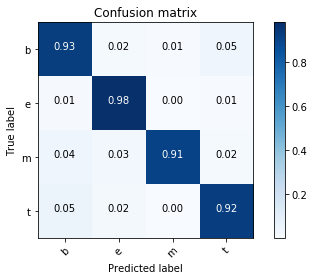

In [7]:
y_pred_test = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

plot_confusion_matrix(cm, encoder.classes_)

In [8]:
print(classification_report(y_test, y_pred_test, target_names=encoder.classes_))

              precision    recall  f1-score   support

           b       0.92      0.93      0.92     23414
           e       0.96      0.98      0.97     30353
           m       0.96      0.91      0.93      9024
           t       0.93      0.92      0.93     21693

   micro avg       0.94      0.94      0.94     84484
   macro avg       0.94      0.93      0.94     84484
weighted avg       0.94      0.94      0.94     84484



In [14]:
from sklearn.model_selection import cross_val_score

vec = TfidfVectorizer()
X_all = vec.fit_transform(X)

lg = LogisticRegression(n_jobs=-1)
scores = cross_val_score(lg, X_train, y_train, cv=5)
print(scores)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

c:\users\mikol\miniconda3\envs\newsletter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mikol\miniconda3\envs\newsletter\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\mikol\miniconda3\envs\newsletter\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[0.93922088 0.94080223 0.94035835 0.93775338 0.93946971]
Accuracy: 0.940 (+/- 0.00)


In [22]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

clf = LogisticRegressionCV(cv=5, n_jobs=-1).fit(X_train, y_train)
print(clf.score(X_train, y_train))
print ('Max auc_roc b:', clf.scores_['b'].mean(axis=0).max())
print ('Max auc_roc e:', clf.scores_['e'].mean(axis=0).max())
print ('Max auc_roc m:', clf.scores_['m'].mean(axis=0).max())
print ('Max auc_roc t:', clf.scores_['t'].mean(axis=0).max())
print(clf.scores_)


c:\users\mikol\miniconda3\envs\newsletter\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\mikol\miniconda3\envs\newsletter\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\mikol\miniconda3\envs\newsletter\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\mikol\miniconda3\envs\newsletter\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\mikol\miniconda3\envs\newsletter\lib\site-packages\sklearn\linear_model\logi

0.9770133309660142
Max auc_roc b: 0.9577522286960267
Max auc_roc e: 0.9816947043353774
Max auc_roc m: 0.9867726061219132
Max auc_roc t: 0.9623270794518536
{'b': array([[0.72612407, 0.72612407, 0.76562754, 0.89285239, 0.94246105,
        0.95672373, 0.95753747, 0.95411975, 0.95158976, 0.95011023],
       [0.72611597, 0.72611597, 0.76473286, 0.89421043, 0.94364301,
        0.95738826, 0.95769897, 0.95346738, 0.94965008, 0.94908784],
       [0.72611597, 0.72611597, 0.76578336, 0.89514256, 0.94447157,
        0.95774335, 0.95904538, 0.95581991, 0.95315667, 0.952698  ],
       [0.72612671, 0.72612671, 0.76437428, 0.892241  , 0.94091972,
        0.9556269 , 0.95694375, 0.95404374, 0.94972332, 0.94997485],
       [0.72612671, 0.72612671, 0.76387122, 0.88994762, 0.93997278,
        0.95583405, 0.95753558, 0.95549374, 0.95106975, 0.95176516]]), 'e': array([[0.63863942, 0.63890574, 0.79723032, 0.94373345, 0.97156342,
        0.98029265, 0.98143189, 0.97944932, 0.97554336, 0.97049816],
       [0.